# K Means Clustering(Pima Diabetes Dataset)

### Import modules

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Define input and outputs

In [2]:
pima = np.loadtxt('pima-indians-diabetes.data', delimiter=',')

##Attribute Information:
#1. Number of times pregnant
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. Diastolic blood pressure (mm Hg)
#4. Triceps skin fold thickness (mm)
#5. 2-Hour serum insulin (mu U/ml)
#6. Body mass index (weight in kg/(height in m)^2)
#7. Diabetes pedigree function
#8. Age (years)
#9. Class variable (0 or 1)

X = pima[:,:8]
y = pima[:,8:9]
print('Class labels:', np.unique(y))

# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)

# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Class labels: [0. 1.]


### Train and evaluate data

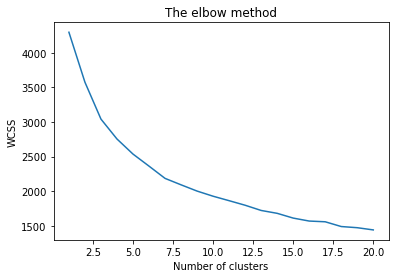

In [3]:
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_std)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, 
plt.plot(range(1, 21), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Plot clusters

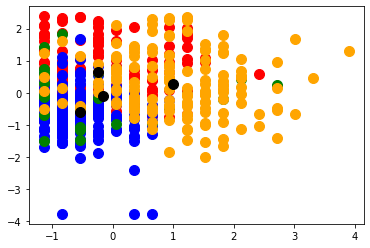

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_std)

#print(y_kmeans)

plt.scatter(X_train_std[y_kmeans == 0, 0], X_train_std[y_kmeans == 0, 1], 
            s = 100, c = 'red')

plt.scatter(X_train_std[y_kmeans == 1, 0], X_train_std[y_kmeans == 1, 1], 
            s = 100, c = 'blue')

plt.scatter(X_train_std[y_kmeans == 2, 0], X_train_std[y_kmeans == 2, 1], 
            s = 100, c = 'green')

plt.scatter(X_train_std[y_kmeans == 3, 0], X_train_std[y_kmeans == 3, 1], 
            s = 100, c = 'orange')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()
